# Function Defs 

In [ ]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 7.8MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=0cc186c80d3c7a21ee9d99968c0a5e6964d168602af3ed14a349e05f42c77638
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split


In [ ]:
# This is a linear regression model that only uses closing price history
def linear_regressor(stock):
    stock_df = stock.history(period='max')
    stock_df.drop(['Volume', 'Dividends', 'Stock Splits'], axis=1, inplace=True)
    stock_df['Days From IPO'] = (stock_df.index - stock_df.index[0]).days
    X = stock_df['Days From IPO'].values.reshape(-1, 1)
    y = stock_df['Close'].values.reshape(-1, 1)
    
    # Does train/Test Split on last year
    split_mark = int(len(stock_df)-365)
    X_train = X[0:split_mark,:]
    X_test = X[split_mark:len(stock_df),:]
    y_train = y[0:split_mark,:]
    y_test = y[split_mark:len(stock_df),:]
    
    stock_model = LinearRegression().fit(X_train, y_train)
    stock_close_pred = stock_model.predict(X_test)

    sell_line = stock_close_pred*1.1
    buy_line = stock_close_pred*0.9
    
    # Plots Results
    plt.plot(stock_df.tail(len(stock_df)-split_mark).index, y_test, color = 'blue', label='Stock Price')
    plt.plot(stock_df.tail(len(stock_df)-split_mark).index, stock_close_pred, color='black', label='Predicted Price')
    plt.plot(stock_df.tail(len(stock_df)-split_mark).index, sell_line, color= 'red', label='Sell Line')
    plt.plot(stock_df.tail(len(stock_df)-split_mark).index, buy_line, color='green', label='Buy Line')
    plt.title(stock)
    plt.legend
    plt.show()
    
    return stock_df

In [ ]:
def poly_regressor(stock, degree=2):
    stock_df = stock.history(period='max')
    stock_df.drop(['Volume', 'Dividends', 'Stock Splits'], axis=1, inplace=True)
    stock_df['Days From IPO'] = (stock_df.index - stock_df.index[0]).days
    X = stock_df['Days From IPO'].values.reshape(-1, 1)
    y = stock_df['Close'].values.reshape(-1, 1)
    polynomial_features= PolynomialFeatures(degree=degree)

    # Transforms x values to polynomial values
    x_poly = polynomial_features.fit_transform(X)
    
    # Does train/Test Split on last year
    split_mark = int(len(stock_df)-365)
    
    X_train = x_poly[0:split_mark,:]
    X_test = x_poly[split_mark:len(stock_df),:]
    y_train = y[0:split_mark,:]
    y_test = y[split_mark:len(stock_df),:]
    
    
    stock_poly_model = LinearRegression().fit(X_train, y_train)
    stock_poly_pred = stock_poly_model.predict(X_test)

    sell_line = stock_poly_pred*1.1
    buy_line = stock_poly_pred*0.9
    
    # Plots Results
    plt.plot(stock_df.tail(len(stock_df)-split_mark).index, y_test, color = 'blue', label='Stock Price')
    plt.plot(stock_df.tail(len(stock_df)-split_mark).index, stock_poly_pred, color='black', label='Predicted Price')
    plt.plot(stock_df.tail(len(stock_df)-split_mark).index, sell_line, color= 'red', label='Sell Line')
    plt.plot(stock_df.tail(len(stock_df)-split_mark).index, buy_line, color='green', label='Buy Line')
    plt.title(stock)
    plt.legend
    plt.show()
    
    return stock_df

In [ ]:
def exponential_regressor(stock):
    stock_df = stock.history(period='max')
    stock_df.drop(['Volume', 'Dividends', 'Stock Splits'], axis=1, inplace=True)
    stock_df['Days From IPO'] = (stock_df.index - stock_df.index[0]).days
    stock_df['Days From IPO'] += 1
    X = stock_df['Days From IPO'].values.reshape(-1, 1)
    y = stock_df['Close'].values.reshape(-1, 1)
    

    # Transforms x values to polynomial values
    #X = np.log(X)
    y = np.log(y)

    # Does train/Test Split on last year
    split_mark = int(len(stock_df)-365)
    
    X_train = X[0:split_mark,:]
    X_test = X[split_mark:len(stock_df),:]
    y_train = y[0:split_mark,:]
    y_test = y[split_mark:len(stock_df),:]
    
    
    stock_poly_model = LinearRegression().fit(X_train, y_train)
    stock_poly_pred = stock_poly_model.predict(X_test)
    
    pred_value = np.exp(stock_poly_pred)

    sell_line = pred_value*1.1
    buy_line = pred_value*0.9
    
    # Plots Results
    plt.plot(stock_df.tail(len(stock_df)-split_mark).index, np.exp(y_test), color = 'blue', label='Stock Price')
    plt.plot(stock_df.tail(len(stock_df)-split_mark).index, pred_value, color='black', label='Predicted Price')
    plt.plot(stock_df.tail(len(stock_df)-split_mark).index, sell_line, color= 'red', label='Sell Line')
    plt.plot(stock_df.tail(len(stock_df)-split_mark).index, buy_line, color='green', label='Buy Line')
    plt.title(stock)
    plt.legend
    plt.show()
    
    return stock_df

# GOOGL

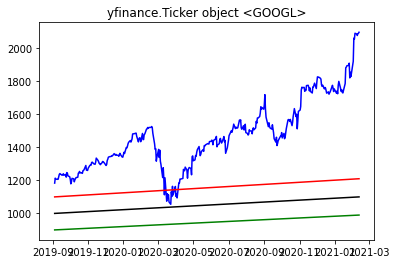

,Open,High,Low,Close,Days From IPO
Date,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,0
2004-08-20,50.555557,54.594597,50.300301,54.209209,1
2004-08-23,55.430431,56.796799,54.579578,54.754753,4
2004-08-24,55.675674,55.855858,51.836838,52.487488,5
2004-08-25,52.532532,54.054054,51.991993,53.053055,6
...,...,...,...,...,...
2021-02-08,2100.000000,2115.000000,2063.350098,2084.520020,6017
2021-02-09,2074.800049,2098.510010,2070.000000,2075.389893,6018
2021-02-10,2083.139893,2098.879883,2052.239990,2086.479980,6019


In [ ]:
googl = yf.Ticker('GOOGL')
linear_regressor(googl)

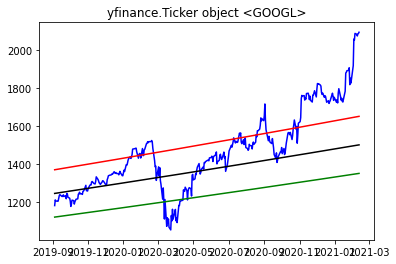

,Open,High,Low,Close,Days From IPO
Date,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,0
2004-08-20,50.555557,54.594597,50.300301,54.209209,1
2004-08-23,55.430431,56.796799,54.579578,54.754753,4
2004-08-24,55.675674,55.855858,51.836838,52.487488,5
2004-08-25,52.532532,54.054054,51.991993,53.053055,6
...,...,...,...,...,...
2021-02-08,2100.000000,2115.000000,2063.350098,2084.520020,6017
2021-02-09,2074.800049,2098.510010,2070.000000,2075.389893,6018
2021-02-10,2083.139893,2098.879883,2052.239990,2086.479980,6019


In [ ]:
poly_regressor(googl, 2)

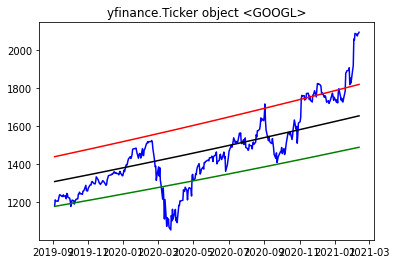

,Open,High,Low,Close,Days From IPO
Date,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,0
2004-08-20,50.555557,54.594597,50.300301,54.209209,1
2004-08-23,55.430431,56.796799,54.579578,54.754753,4
2004-08-24,55.675674,55.855858,51.836838,52.487488,5
2004-08-25,52.532532,54.054054,51.991993,53.053055,6
...,...,...,...,...,...
2021-02-08,2100.000000,2115.000000,2063.350098,2084.520020,6017
2021-02-09,2074.800049,2098.510010,2070.000000,2075.389893,6018
2021-02-10,2083.139893,2098.879883,2052.239990,2086.479980,6019


In [ ]:
poly_regressor(googl, 3)

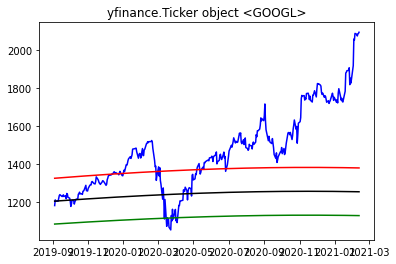

,Open,High,Low,Close,Days From IPO
Date,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,0
2004-08-20,50.555557,54.594597,50.300301,54.209209,1
2004-08-23,55.430431,56.796799,54.579578,54.754753,4
2004-08-24,55.675674,55.855858,51.836838,52.487488,5
2004-08-25,52.532532,54.054054,51.991993,53.053055,6
...,...,...,...,...,...
2021-02-08,2100.000000,2115.000000,2063.350098,2084.520020,6017
2021-02-09,2074.800049,2098.510010,2070.000000,2075.389893,6018
2021-02-10,2083.139893,2098.879883,2052.239990,2086.479980,6019


In [ ]:
poly_regressor(googl, 4)

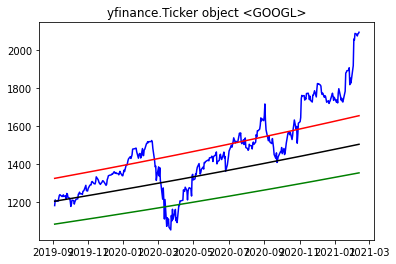

,Open,High,Low,Close,Days From IPO
Date,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,1
2004-08-20,50.555557,54.594597,50.300301,54.209209,2
2004-08-23,55.430431,56.796799,54.579578,54.754753,5
2004-08-24,55.675674,55.855858,51.836838,52.487488,6
2004-08-25,52.532532,54.054054,51.991993,53.053055,7
...,...,...,...,...,...
2021-02-08,2100.000000,2115.000000,2063.350098,2084.520020,6018
2021-02-09,2074.800049,2098.510010,2070.000000,2075.389893,6019
2021-02-10,2083.139893,2098.879883,2052.239990,2086.479980,6020


In [ ]:
exponential_regressor(googl)

# GOOG

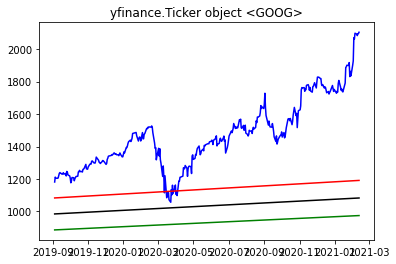

,Open,High,Low,Close,Days From IPO
Date,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,0
2004-08-20,50.316402,54.336334,50.062355,53.952770,1
2004-08-23,55.168217,56.528118,54.321388,54.495735,4
2004-08-24,55.412300,55.591629,51.591621,52.239197,5
2004-08-25,52.284027,53.798351,51.746044,52.802086,6
...,...,...,...,...,...
2021-02-08,2105.909912,2123.547119,2072.000000,2092.909912,6017
2021-02-09,2078.540039,2105.129883,2078.540039,2083.510010,6018
2021-02-10,2094.209961,2108.370117,2063.090088,2095.379883,6019


In [ ]:
goog = yf.Ticker('goog')
linear_regressor(goog)

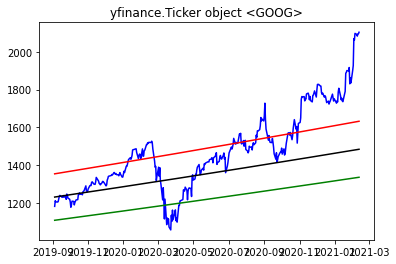

,Open,High,Low,Close,Days From IPO
Date,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,0
2004-08-20,50.316402,54.336334,50.062355,53.952770,1
2004-08-23,55.168217,56.528118,54.321388,54.495735,4
2004-08-24,55.412300,55.591629,51.591621,52.239197,5
2004-08-25,52.284027,53.798351,51.746044,52.802086,6
...,...,...,...,...,...
2021-02-08,2105.909912,2123.547119,2072.000000,2092.909912,6017
2021-02-09,2078.540039,2105.129883,2078.540039,2083.510010,6018
2021-02-10,2094.209961,2108.370117,2063.090088,2095.379883,6019


In [ ]:
poly_regressor(goog, 2)

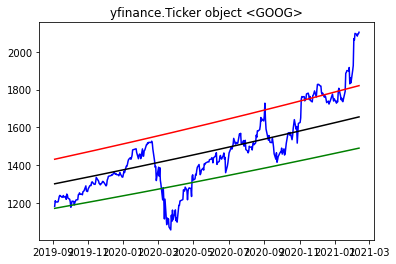

,Open,High,Low,Close,Days From IPO
Date,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,0
2004-08-20,50.316402,54.336334,50.062355,53.952770,1
2004-08-23,55.168217,56.528118,54.321388,54.495735,4
2004-08-24,55.412300,55.591629,51.591621,52.239197,5
2004-08-25,52.284027,53.798351,51.746044,52.802086,6
...,...,...,...,...,...
2021-02-08,2105.909912,2123.547119,2072.000000,2092.909912,6017
2021-02-09,2078.540039,2105.129883,2078.540039,2083.510010,6018
2021-02-10,2094.209961,2108.370117,2063.090088,2095.379883,6019


In [ ]:
poly_regressor(goog, 3)

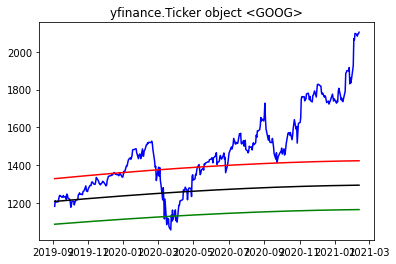

,Open,High,Low,Close,Days From IPO
Date,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,0
2004-08-20,50.316402,54.336334,50.062355,53.952770,1
2004-08-23,55.168217,56.528118,54.321388,54.495735,4
2004-08-24,55.412300,55.591629,51.591621,52.239197,5
2004-08-25,52.284027,53.798351,51.746044,52.802086,6
...,...,...,...,...,...
2021-02-08,2105.909912,2123.547119,2072.000000,2092.909912,6017
2021-02-09,2078.540039,2105.129883,2078.540039,2083.510010,6018
2021-02-10,2094.209961,2108.370117,2063.090088,2095.379883,6019


In [ ]:
poly_regressor(goog, 4)

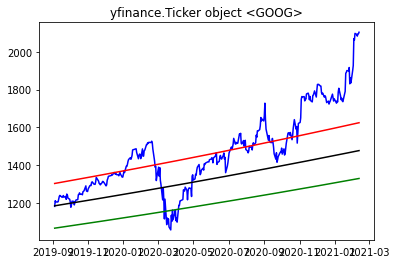

,Open,High,Low,Close,Days From IPO
Date,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,1
2004-08-20,50.316402,54.336334,50.062355,53.952770,2
2004-08-23,55.168217,56.528118,54.321388,54.495735,5
2004-08-24,55.412300,55.591629,51.591621,52.239197,6
2004-08-25,52.284027,53.798351,51.746044,52.802086,7
...,...,...,...,...,...
2021-02-08,2105.909912,2123.547119,2072.000000,2092.909912,6018
2021-02-09,2078.540039,2105.129883,2078.540039,2083.510010,6019
2021-02-10,2094.209961,2108.370117,2063.090088,2095.379883,6020


In [ ]:
exponential_regressor(goog)

# AMZN

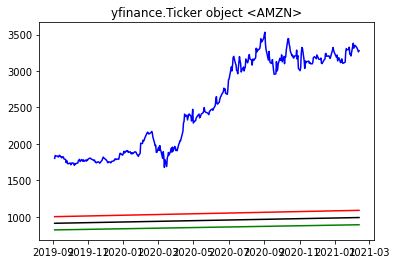

,Open,High,Low,Close,Days From IPO
Date,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,0
1997-05-16,1.968750,1.979167,1.708333,1.729167,1
1997-05-19,1.760417,1.770833,1.625000,1.708333,4
1997-05-20,1.729167,1.750000,1.635417,1.635417,5
1997-05-21,1.635417,1.645833,1.375000,1.427083,6
...,...,...,...,...,...
2021-02-08,3358.500000,3365.000000,3304.000000,3322.939941,8670
2021-02-09,3312.489990,3338.000000,3297.840088,3305.000000,8671
2021-02-10,3314.000000,3317.949951,3254.000000,3286.580078,8672


In [ ]:
amzn = yf.Ticker('amzn')
linear_regressor(amzn)

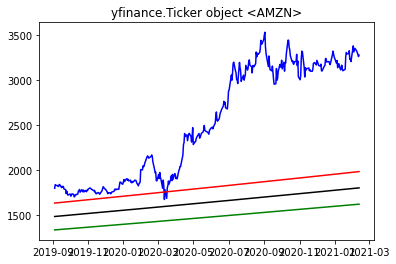

,Open,High,Low,Close,Days From IPO
Date,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,0
1997-05-16,1.968750,1.979167,1.708333,1.729167,1
1997-05-19,1.760417,1.770833,1.625000,1.708333,4
1997-05-20,1.729167,1.750000,1.635417,1.635417,5
1997-05-21,1.635417,1.645833,1.375000,1.427083,6
...,...,...,...,...,...
2021-02-08,3358.500000,3365.000000,3304.000000,3322.939941,8670
2021-02-09,3312.489990,3338.000000,3297.840088,3305.000000,8671
2021-02-10,3314.000000,3317.949951,3254.000000,3286.580078,8672


In [ ]:
poly_regressor(amzn, 2)

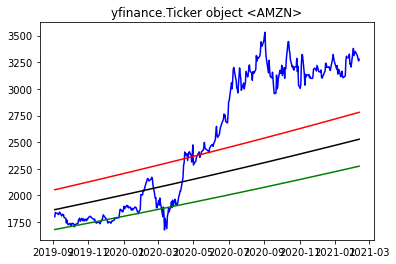

,Open,High,Low,Close,Days From IPO
Date,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,0
1997-05-16,1.968750,1.979167,1.708333,1.729167,1
1997-05-19,1.760417,1.770833,1.625000,1.708333,4
1997-05-20,1.729167,1.750000,1.635417,1.635417,5
1997-05-21,1.635417,1.645833,1.375000,1.427083,6
...,...,...,...,...,...
2021-02-08,3358.500000,3365.000000,3304.000000,3322.939941,8670
2021-02-09,3312.489990,3338.000000,3297.840088,3305.000000,8671
2021-02-10,3314.000000,3317.949951,3254.000000,3286.580078,8672


In [ ]:
poly_regressor(amzn, 3)

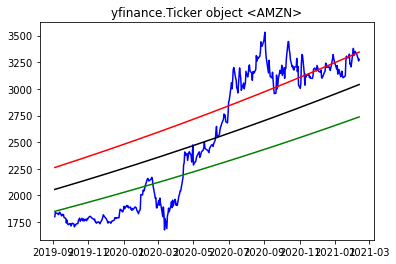

,Open,High,Low,Close,Days From IPO
Date,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,0
1997-05-16,1.968750,1.979167,1.708333,1.729167,1
1997-05-19,1.760417,1.770833,1.625000,1.708333,4
1997-05-20,1.729167,1.750000,1.635417,1.635417,5
1997-05-21,1.635417,1.645833,1.375000,1.427083,6
...,...,...,...,...,...
2021-02-08,3358.500000,3365.000000,3304.000000,3322.939941,8670
2021-02-09,3312.489990,3338.000000,3297.840088,3305.000000,8671
2021-02-10,3314.000000,3317.949951,3254.000000,3286.580078,8672


In [ ]:
poly_regressor(amzn, 4)

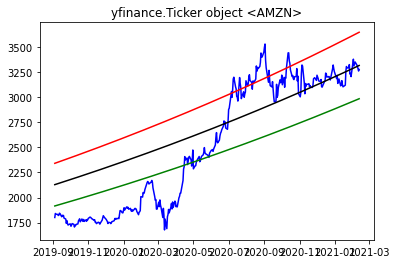

,Open,High,Low,Close,Days From IPO
Date,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,0
1997-05-16,1.968750,1.979167,1.708333,1.729167,1
1997-05-19,1.760417,1.770833,1.625000,1.708333,4
1997-05-20,1.729167,1.750000,1.635417,1.635417,5
1997-05-21,1.635417,1.645833,1.375000,1.427083,6
...,...,...,...,...,...
2021-02-08,3358.500000,3365.000000,3304.000000,3322.939941,8670
2021-02-09,3312.489990,3338.000000,3297.840088,3305.000000,8671
2021-02-10,3314.000000,3317.949951,3254.000000,3286.580078,8672


In [ ]:
poly_regressor(amzn, 5)

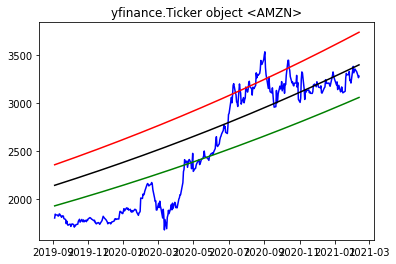

,Open,High,Low,Close,Days From IPO
Date,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,0
1997-05-16,1.968750,1.979167,1.708333,1.729167,1
1997-05-19,1.760417,1.770833,1.625000,1.708333,4
1997-05-20,1.729167,1.750000,1.635417,1.635417,5
1997-05-21,1.635417,1.645833,1.375000,1.427083,6
...,...,...,...,...,...
2021-02-08,3358.500000,3365.000000,3304.000000,3322.939941,8670
2021-02-09,3312.489990,3338.000000,3297.840088,3305.000000,8671
2021-02-10,3314.000000,3317.949951,3254.000000,3286.580078,8672


In [ ]:
poly_regressor(amzn, 6)

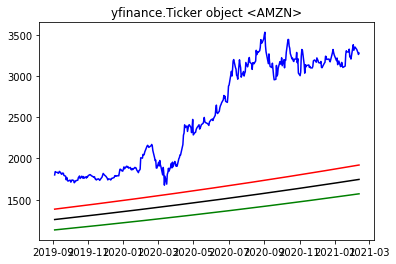

,Open,High,Low,Close,Days From IPO
Date,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1
1997-05-16,1.968750,1.979167,1.708333,1.729167,2
1997-05-19,1.760417,1.770833,1.625000,1.708333,5
1997-05-20,1.729167,1.750000,1.635417,1.635417,6
1997-05-21,1.635417,1.645833,1.375000,1.427083,7
...,...,...,...,...,...
2021-02-08,3358.500000,3365.000000,3304.000000,3322.939941,8671
2021-02-09,3312.489990,3338.000000,3297.840088,3305.000000,8672
2021-02-10,3314.000000,3317.949951,3254.000000,3286.580078,8673


In [ ]:
exponential_regressor(amzn)

# AAPL

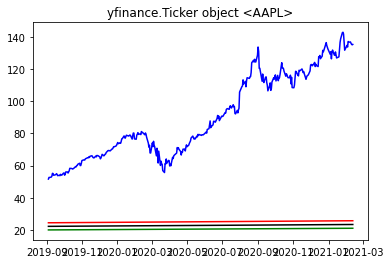

,Open,High,Low,Close,Days From IPO
Date,,,,,
1980-12-12,0.100922,0.101361,0.100922,0.100922,0
1980-12-15,0.096096,0.096096,0.095657,0.095657,3
1980-12-16,0.089075,0.089075,0.088636,0.088636,4
1980-12-17,0.090830,0.091268,0.090830,0.090830,5
1980-12-18,0.093463,0.093902,0.093463,0.093463,6
...,...,...,...,...,...
2021-02-08,136.029999,136.960007,134.919998,136.910004,14668
2021-02-09,136.619995,137.880005,135.850006,136.009995,14669
2021-02-10,136.479996,136.990005,134.399994,135.389999,14670


In [ ]:
aapl = yf.Ticker('aapl')
linear_regressor(aapl)

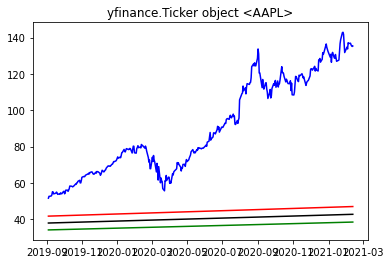

,Open,High,Low,Close,Days From IPO
Date,,,,,
1980-12-12,0.100922,0.101361,0.100922,0.100922,0
1980-12-15,0.096096,0.096096,0.095657,0.095657,3
1980-12-16,0.089075,0.089075,0.088636,0.088636,4
1980-12-17,0.090830,0.091268,0.090830,0.090830,5
1980-12-18,0.093463,0.093902,0.093463,0.093463,6
...,...,...,...,...,...
2021-02-08,136.029999,136.960007,134.919998,136.910004,14668
2021-02-09,136.619995,137.880005,135.850006,136.009995,14669
2021-02-10,136.479996,136.990005,134.399994,135.389999,14670


In [ ]:
poly_regressor(aapl, 2)

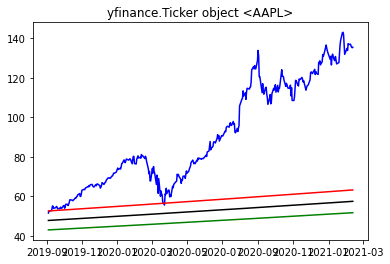

,Open,High,Low,Close,Days From IPO
Date,,,,,
1980-12-12,0.100922,0.101361,0.100922,0.100922,0
1980-12-15,0.096096,0.096096,0.095657,0.095657,3
1980-12-16,0.089075,0.089075,0.088636,0.088636,4
1980-12-17,0.090830,0.091268,0.090830,0.090830,5
1980-12-18,0.093463,0.093902,0.093463,0.093463,6
...,...,...,...,...,...
2021-02-08,136.029999,136.960007,134.919998,136.910004,14668
2021-02-09,136.619995,137.880005,135.850006,136.009995,14669
2021-02-10,136.479996,136.990005,134.399994,135.389999,14670


In [ ]:
poly_regressor(aapl, 3)

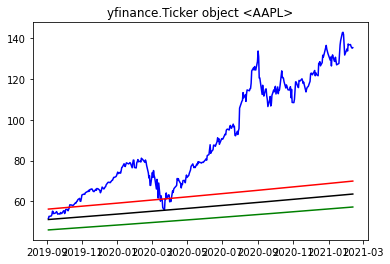

,Open,High,Low,Close,Days From IPO
Date,,,,,
1980-12-12,0.100922,0.101361,0.100922,0.100922,0
1980-12-15,0.096096,0.096096,0.095657,0.095657,3
1980-12-16,0.089075,0.089075,0.088636,0.088636,4
1980-12-17,0.090830,0.091268,0.090830,0.090830,5
1980-12-18,0.093463,0.093902,0.093463,0.093463,6
...,...,...,...,...,...
2021-02-08,136.029999,136.960007,134.919998,136.910004,14668
2021-02-09,136.619995,137.880005,135.850006,136.009995,14669
2021-02-10,136.479996,136.990005,134.399994,135.389999,14670


In [ ]:
poly_regressor(aapl, 4)

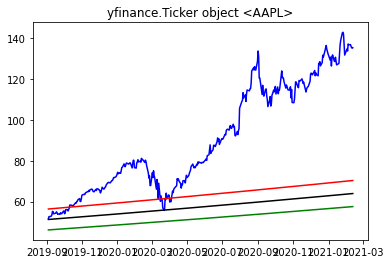

,Open,High,Low,Close,Days From IPO
Date,,,,,
1980-12-12,0.100922,0.101361,0.100922,0.100922,0
1980-12-15,0.096096,0.096096,0.095657,0.095657,3
1980-12-16,0.089075,0.089075,0.088636,0.088636,4
1980-12-17,0.090830,0.091268,0.090830,0.090830,5
1980-12-18,0.093463,0.093902,0.093463,0.093463,6
...,...,...,...,...,...
2021-02-08,136.029999,136.960007,134.919998,136.910004,14668
2021-02-09,136.619995,137.880005,135.850006,136.009995,14669
2021-02-10,136.479996,136.990005,134.399994,135.389999,14670


In [ ]:
poly_regressor(aapl, 5)

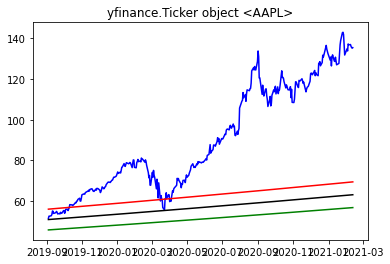

,Open,High,Low,Close,Days From IPO
Date,,,,,
1980-12-12,0.100922,0.101361,0.100922,0.100922,0
1980-12-15,0.096096,0.096096,0.095657,0.095657,3
1980-12-16,0.089075,0.089075,0.088636,0.088636,4
1980-12-17,0.090830,0.091268,0.090830,0.090830,5
1980-12-18,0.093463,0.093902,0.093463,0.093463,6
...,...,...,...,...,...
2021-02-08,136.029999,136.960007,134.919998,136.910004,14668
2021-02-09,136.619995,137.880005,135.850006,136.009995,14669
2021-02-10,136.479996,136.990005,134.399994,135.389999,14670


In [ ]:
poly_regressor(aapl, 6)

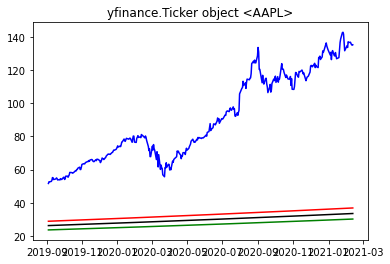

,Open,High,Low,Close,Days From IPO
Date,,,,,
1980-12-12,0.100922,0.101361,0.100922,0.100922,1
1980-12-15,0.096096,0.096096,0.095657,0.095657,4
1980-12-16,0.089075,0.089075,0.088636,0.088636,5
1980-12-17,0.090830,0.091268,0.090830,0.090830,6
1980-12-18,0.093463,0.093902,0.093463,0.093463,7
...,...,...,...,...,...
2021-02-08,136.029999,136.960007,134.919998,136.910004,14669
2021-02-09,136.619995,137.880005,135.850006,136.009995,14670
2021-02-10,136.479996,136.990005,134.399994,135.389999,14671


In [ ]:
exponential_regressor(aapl)

# MSFT

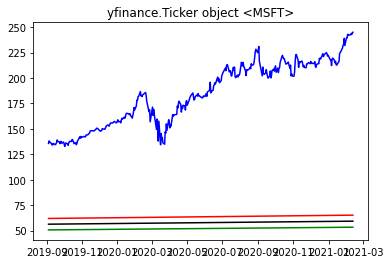

,Open,High,Low,Close,Days From IPO
Date,,,,,
1986-03-13,0.056367,0.064656,0.056367,0.061893,0
1986-03-14,0.061893,0.065209,0.061893,0.064103,1
1986-03-17,0.064103,0.065762,0.064103,0.065209,4
1986-03-18,0.065209,0.065762,0.062998,0.063551,5
1986-03-19,0.063551,0.064103,0.061893,0.062445,6
...,...,...,...,...,...
2021-02-08,243.149994,243.679993,240.809998,242.470001,12751
2021-02-09,241.869995,244.759995,241.380005,243.770004,12752
2021-02-10,245.000000,245.919998,240.889999,242.820007,12753


In [ ]:
msft = yf.Ticker('msft')
linear_regressor(msft)

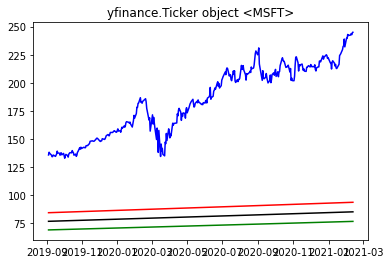

,Open,High,Low,Close,Days From IPO
Date,,,,,
1986-03-13,0.056367,0.064656,0.056367,0.061893,0
1986-03-14,0.061893,0.065209,0.061893,0.064103,1
1986-03-17,0.064103,0.065762,0.064103,0.065209,4
1986-03-18,0.065209,0.065762,0.062998,0.063551,5
1986-03-19,0.063551,0.064103,0.061893,0.062445,6
...,...,...,...,...,...
2021-02-08,243.149994,243.679993,240.809998,242.470001,12751
2021-02-09,241.869995,244.759995,241.380005,243.770004,12752
2021-02-10,245.000000,245.919998,240.889999,242.820007,12753


In [ ]:
poly_regressor(msft)

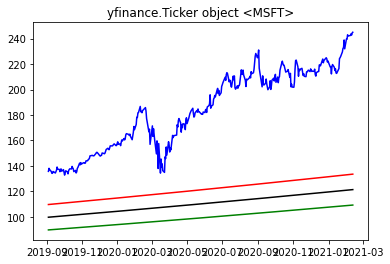

,Open,High,Low,Close,Days From IPO
Date,,,,,
1986-03-13,0.056367,0.064656,0.056367,0.061893,0
1986-03-14,0.061893,0.065209,0.061893,0.064103,1
1986-03-17,0.064103,0.065762,0.064103,0.065209,4
1986-03-18,0.065209,0.065762,0.062998,0.063551,5
1986-03-19,0.063551,0.064103,0.061893,0.062445,6
...,...,...,...,...,...
2021-02-08,243.149994,243.679993,240.809998,242.470001,12751
2021-02-09,241.869995,244.759995,241.380005,243.770004,12752
2021-02-10,245.000000,245.919998,240.889999,242.820007,12753


In [ ]:
poly_regressor(msft, 3)

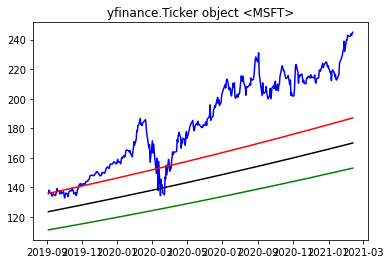

,Open,High,Low,Close,Days From IPO
Date,,,,,
1986-03-13,0.056367,0.064656,0.056367,0.061893,0
1986-03-14,0.061893,0.065209,0.061893,0.064103,1
1986-03-17,0.064103,0.065762,0.064103,0.065209,4
1986-03-18,0.065209,0.065762,0.062998,0.063551,5
1986-03-19,0.063551,0.064103,0.061893,0.062445,6
...,...,...,...,...,...
2021-02-08,243.149994,243.679993,240.809998,242.470001,12751
2021-02-09,241.869995,244.759995,241.380005,243.770004,12752
2021-02-10,245.000000,245.919998,240.889999,242.820007,12753


In [ ]:
poly_regressor(msft, 4)

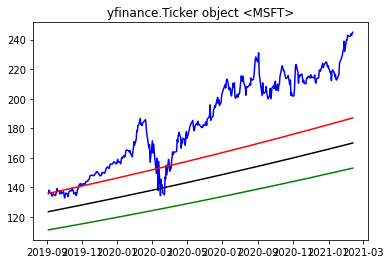

,Open,High,Low,Close,Days From IPO
Date,,,,,
1986-03-13,0.056367,0.064656,0.056367,0.061893,0
1986-03-14,0.061893,0.065209,0.061893,0.064103,1
1986-03-17,0.064103,0.065762,0.064103,0.065209,4
1986-03-18,0.065209,0.065762,0.062998,0.063551,5
1986-03-19,0.063551,0.064103,0.061893,0.062445,6
...,...,...,...,...,...
2021-02-08,243.149994,243.679993,240.809998,242.470001,12751
2021-02-09,241.869995,244.759995,241.380005,243.770004,12752
2021-02-10,245.000000,245.919998,240.889999,242.820007,12753


In [ ]:
poly_regressor(msft, 4)

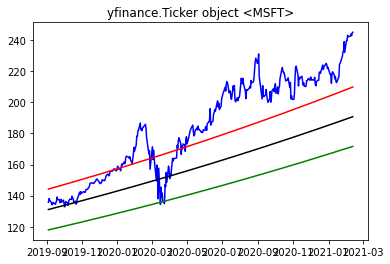

,Open,High,Low,Close,Days From IPO
Date,,,,,
1986-03-13,0.056367,0.064656,0.056367,0.061893,0
1986-03-14,0.061893,0.065209,0.061893,0.064103,1
1986-03-17,0.064103,0.065762,0.064103,0.065209,4
1986-03-18,0.065209,0.065762,0.062998,0.063551,5
1986-03-19,0.063551,0.064103,0.061893,0.062445,6
...,...,...,...,...,...
2021-02-08,243.149994,243.679993,240.809998,242.470001,12751
2021-02-09,241.869995,244.759995,241.380005,243.770004,12752
2021-02-10,245.000000,245.919998,240.889999,242.820007,12753


In [ ]:
poly_regressor(msft, 5)

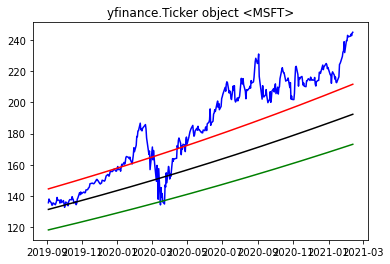

,Open,High,Low,Close,Days From IPO
Date,,,,,
1986-03-13,0.056367,0.064656,0.056367,0.061893,0
1986-03-14,0.061893,0.065209,0.061893,0.064103,1
1986-03-17,0.064103,0.065762,0.064103,0.065209,4
1986-03-18,0.065209,0.065762,0.062998,0.063551,5
1986-03-19,0.063551,0.064103,0.061893,0.062445,6
...,...,...,...,...,...
2021-02-08,243.149994,243.679993,240.809998,242.470001,12751
2021-02-09,241.869995,244.759995,241.380005,243.770004,12752
2021-02-10,245.000000,245.919998,240.889999,242.820007,12753


In [ ]:
poly_regressor(msft, 6)

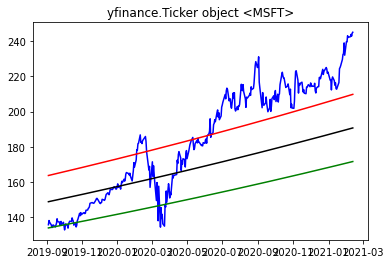

,Open,High,Low,Close,Days From IPO
Date,,,,,
1986-03-13,0.056367,0.064656,0.056367,0.061893,1
1986-03-14,0.061893,0.065209,0.061893,0.064103,2
1986-03-17,0.064103,0.065762,0.064103,0.065209,5
1986-03-18,0.065209,0.065762,0.062998,0.063551,6
1986-03-19,0.063551,0.064103,0.061893,0.062445,7
...,...,...,...,...,...
2021-02-08,243.149994,243.679993,240.809998,242.470001,12752
2021-02-09,241.869995,244.759995,241.380005,243.770004,12753
2021-02-10,245.000000,245.919998,240.889999,242.820007,12754


In [ ]:
exponential_regressor(msft)

# FB

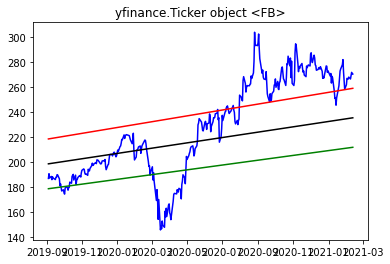

,Open,High,Low,Close,Days From IPO
Date,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,0
2012-05-21,36.529999,36.660000,33.000000,34.029999,3
2012-05-22,32.610001,33.590000,30.940001,31.000000,4
2012-05-23,31.370001,32.500000,31.360001,32.000000,5
2012-05-24,32.950001,33.209999,31.770000,33.029999,6
...,...,...,...,...,...
2021-02-08,268.750000,269.859985,265.000000,266.579987,3188
2021-02-09,266.440002,273.390015,265.750000,269.450012,3189
2021-02-10,272.450012,273.799988,267.720001,271.869995,3190


In [ ]:
fb = yf.Ticker('fb')
linear_regressor(fb)

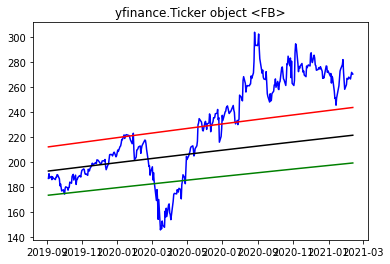

,Open,High,Low,Close,Days From IPO
Date,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,0
2012-05-21,36.529999,36.660000,33.000000,34.029999,3
2012-05-22,32.610001,33.590000,30.940001,31.000000,4
2012-05-23,31.370001,32.500000,31.360001,32.000000,5
2012-05-24,32.950001,33.209999,31.770000,33.029999,6
...,...,...,...,...,...
2021-02-08,268.750000,269.859985,265.000000,266.579987,3188
2021-02-09,266.440002,273.390015,265.750000,269.450012,3189
2021-02-10,272.450012,273.799988,267.720001,271.869995,3190


In [ ]:
poly_regressor(fb)

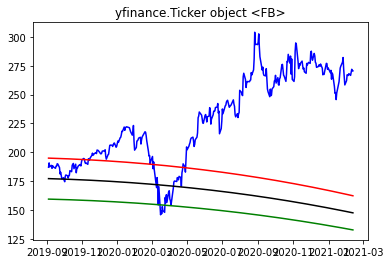

,Open,High,Low,Close,Days From IPO
Date,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,0
2012-05-21,36.529999,36.660000,33.000000,34.029999,3
2012-05-22,32.610001,33.590000,30.940001,31.000000,4
2012-05-23,31.370001,32.500000,31.360001,32.000000,5
2012-05-24,32.950001,33.209999,31.770000,33.029999,6
...,...,...,...,...,...
2021-02-08,268.750000,269.859985,265.000000,266.579987,3188
2021-02-09,266.440002,273.390015,265.750000,269.450012,3189
2021-02-10,272.450012,273.799988,267.720001,271.869995,3190


In [ ]:
poly_regressor(fb, 3)

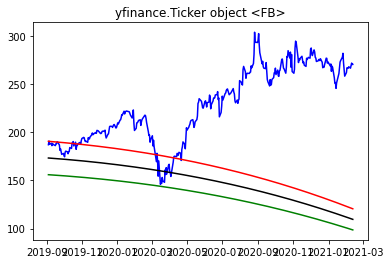

,Open,High,Low,Close,Days From IPO
Date,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,0
2012-05-21,36.529999,36.660000,33.000000,34.029999,3
2012-05-22,32.610001,33.590000,30.940001,31.000000,4
2012-05-23,31.370001,32.500000,31.360001,32.000000,5
2012-05-24,32.950001,33.209999,31.770000,33.029999,6
...,...,...,...,...,...
2021-02-08,268.750000,269.859985,265.000000,266.579987,3188
2021-02-09,266.440002,273.390015,265.750000,269.450012,3189
2021-02-10,272.450012,273.799988,267.720001,271.869995,3190


In [ ]:
poly_regressor(fb, 4)

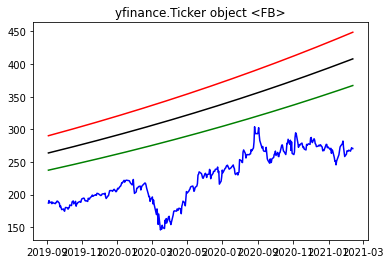

,Open,High,Low,Close,Days From IPO
Date,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,1
2012-05-21,36.529999,36.660000,33.000000,34.029999,4
2012-05-22,32.610001,33.590000,30.940001,31.000000,5
2012-05-23,31.370001,32.500000,31.360001,32.000000,6
2012-05-24,32.950001,33.209999,31.770000,33.029999,7
...,...,...,...,...,...
2021-02-08,268.750000,269.859985,265.000000,266.579987,3189
2021-02-09,266.440002,273.390015,265.750000,269.450012,3190
2021-02-10,272.450012,273.799988,267.720001,271.869995,3191


In [ ]:
exponential_regressor(fb)

# TSLA

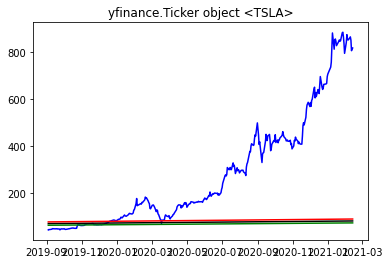

,Open,High,Low,Close,Days From IPO
Date,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,0
2010-06-30,5.158000,6.084000,4.660000,4.766000,1
2010-07-01,5.000000,5.184000,4.054000,4.392000,2
2010-07-02,4.600000,4.620000,3.742000,3.840000,3
2010-07-06,4.000000,4.000000,3.166000,3.222000,7
...,...,...,...,...,...
2021-02-08,869.669983,877.770020,854.750000,863.419983,3877
2021-02-09,855.119995,859.799988,841.750000,849.460022,3878
2021-02-10,843.640015,844.820007,800.020020,804.820007,3879


In [ ]:
tsla = yf.Ticker('tsla')
linear_regressor(tsla)

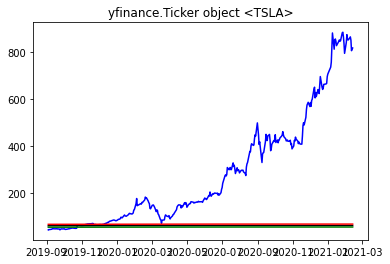

,Open,High,Low,Close,Days From IPO
Date,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,0
2010-06-30,5.158000,6.084000,4.660000,4.766000,1
2010-07-01,5.000000,5.184000,4.054000,4.392000,2
2010-07-02,4.600000,4.620000,3.742000,3.840000,3
2010-07-06,4.000000,4.000000,3.166000,3.222000,7
...,...,...,...,...,...
2021-02-08,869.669983,877.770020,854.750000,863.419983,3877
2021-02-09,855.119995,859.799988,841.750000,849.460022,3878
2021-02-10,843.640015,844.820007,800.020020,804.820007,3879


In [ ]:
poly_regressor(tsla)

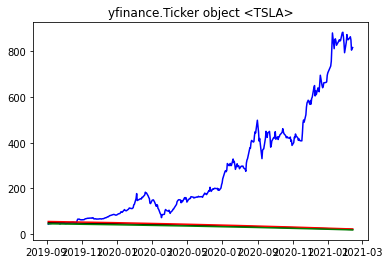

,Open,High,Low,Close,Days From IPO
Date,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,0
2010-06-30,5.158000,6.084000,4.660000,4.766000,1
2010-07-01,5.000000,5.184000,4.054000,4.392000,2
2010-07-02,4.600000,4.620000,3.742000,3.840000,3
2010-07-06,4.000000,4.000000,3.166000,3.222000,7
...,...,...,...,...,...
2021-02-08,869.669983,877.770020,854.750000,863.419983,3877
2021-02-09,855.119995,859.799988,841.750000,849.460022,3878
2021-02-10,843.640015,844.820007,800.020020,804.820007,3879


In [ ]:
poly_regressor(tsla, 3)

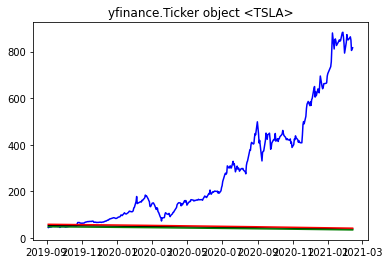

,Open,High,Low,Close,Days From IPO
Date,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,0
2010-06-30,5.158000,6.084000,4.660000,4.766000,1
2010-07-01,5.000000,5.184000,4.054000,4.392000,2
2010-07-02,4.600000,4.620000,3.742000,3.840000,3
2010-07-06,4.000000,4.000000,3.166000,3.222000,7
...,...,...,...,...,...
2021-02-08,869.669983,877.770020,854.750000,863.419983,3877
2021-02-09,855.119995,859.799988,841.750000,849.460022,3878
2021-02-10,843.640015,844.820007,800.020020,804.820007,3879


In [ ]:
poly_regressor(tsla, 4)

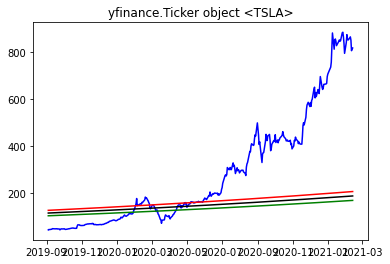

,Open,High,Low,Close,Days From IPO
Date,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,1
2010-06-30,5.158000,6.084000,4.660000,4.766000,2
2010-07-01,5.000000,5.184000,4.054000,4.392000,3
2010-07-02,4.600000,4.620000,3.742000,3.840000,4
2010-07-06,4.000000,4.000000,3.166000,3.222000,8
...,...,...,...,...,...
2021-02-08,869.669983,877.770020,854.750000,863.419983,3878
2021-02-09,855.119995,859.799988,841.750000,849.460022,3879
2021-02-10,843.640015,844.820007,800.020020,804.820007,3880


In [ ]:
exponential_regressor(tsla)